### Importing Necessary Libraries 
    Here we are importing necessary libraries which we will be using in this project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# importing csv file that contains the data
netflix = pd.read_csv("netflix_titles.csv")

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# slicing movies and tv shows in two different variables
movies= netflix[netflix["type"] == "Movie"]
tv = netflix[netflix["type"] == "TV Show"]

In [5]:
# pre-processing data for better understanding
movies["rating"] = movies["rating"].str.replace("74 min", "NR")
movies["rating"] = movies["rating"].str.replace("84 min", "NR")
movies["rating"] = movies["rating"].str.replace("66 min", "NR")
movies["rating"] = movies["rating"].str.replace("UR", "NR")

# Movies Vs TV Shows
    Comparing to see which of these two has more content

In [4]:
# plt.style.use("ggplot")
netflix["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

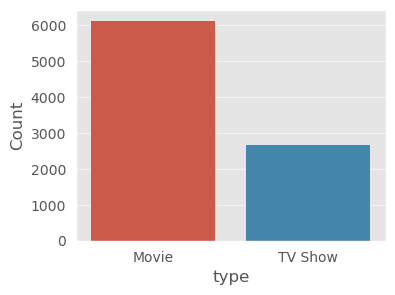

In [23]:
plt.figure(figsize = [4,3])
# netflix["type"].hist(color = "red",figsize = [5,4])
sns.barplot(netflix["type"].value_counts().keys(),netflix["type"].value_counts())
plt.ylabel("Count")
plt.xlabel("type")
plt.grid(False)
plt.tick_params(bottom = False, left = False)
plt.grid(axis = "y",  alpha = 0.6)
plt.show()

# Movie ratings analysis
    Finding out which genre has the highest no of movies

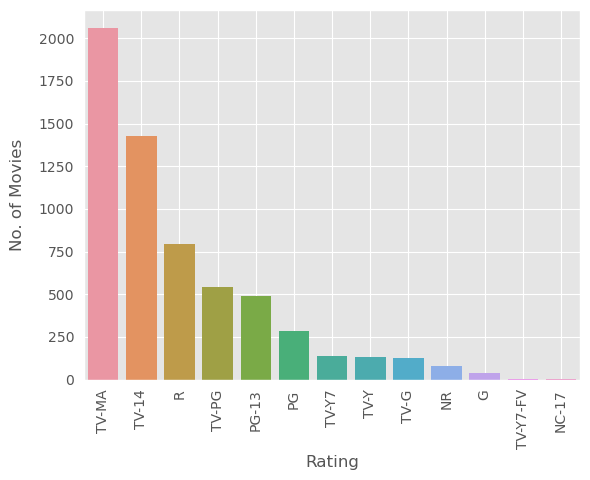

In [24]:
sns.barplot(movies["rating"].value_counts().keys(), movies["rating"].value_counts())

plt.xlabel("Rating")
plt.ylabel("No. of Movies", labelpad = 10)
plt.xticks(rotation = 90)
plt.grid(axis = "x")
plt.tick_params(bottom = False, left = False)

plt.show()

# Year Wise Analysis
    It shows in which year most movies were released

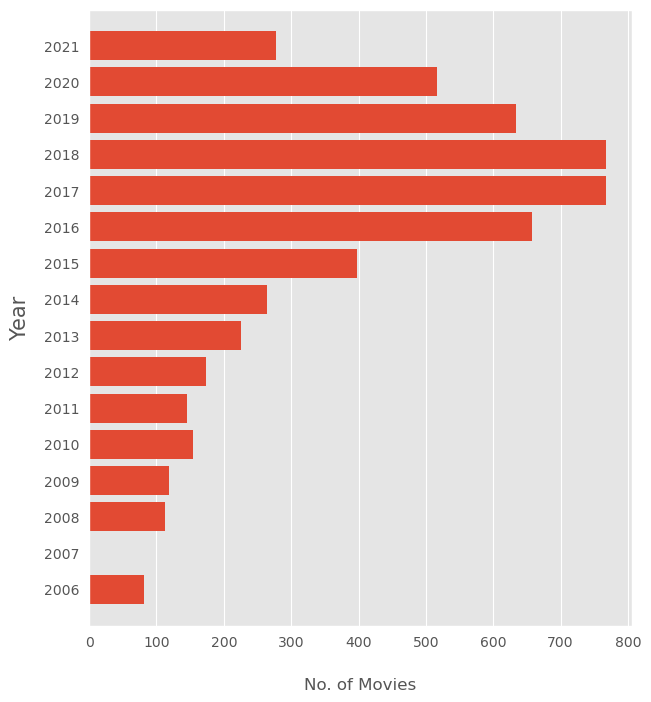

In [28]:
plt.figure(figsize = [7,8])
plt.barh(movies["release_year"].value_counts().iloc[:15].keys(), width = movies["release_year"].value_counts().iloc[:15])

plt.ylim(2005, 2022)
plt.yticks([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
plt.tick_params(left = False, bottom = False)
plt.grid(axis = "y")
plt.ylabel("Year", labelpad = 10, size = 15)
plt.xlabel("No. of Movies", labelpad = 20)

plt.show()

# TOP 10 CONTENT CREATING COUNTRIES
    Which country creates the most content

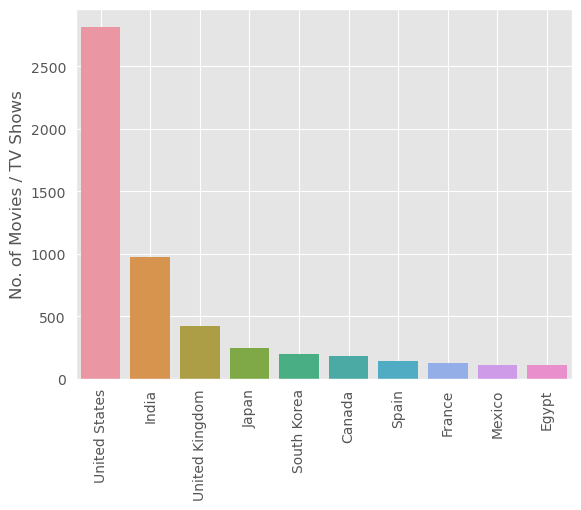

In [29]:
sns.barplot(netflix["country"].value_counts()[:10].keys(), netflix["country"].value_counts()[:10])
plt.xticks(rotation = 90)
plt.ylabel("No. of Movies / TV Shows")
plt.grid(axis = "x")
plt.tick_params(left = False, bottom = False)

plt.show()

# Analysis of Duration of Movies
    Using time-series to analyze the average duration of movies

In [11]:
movies["duration"] = movies["duration"].str.strip(" min")
movies["duration"] = movies["duration"].astype(float)

In [12]:
movie_duration = movies["duration"].value_counts().keys()
movie_duration

movie_count = movies["duration"].value_counts()

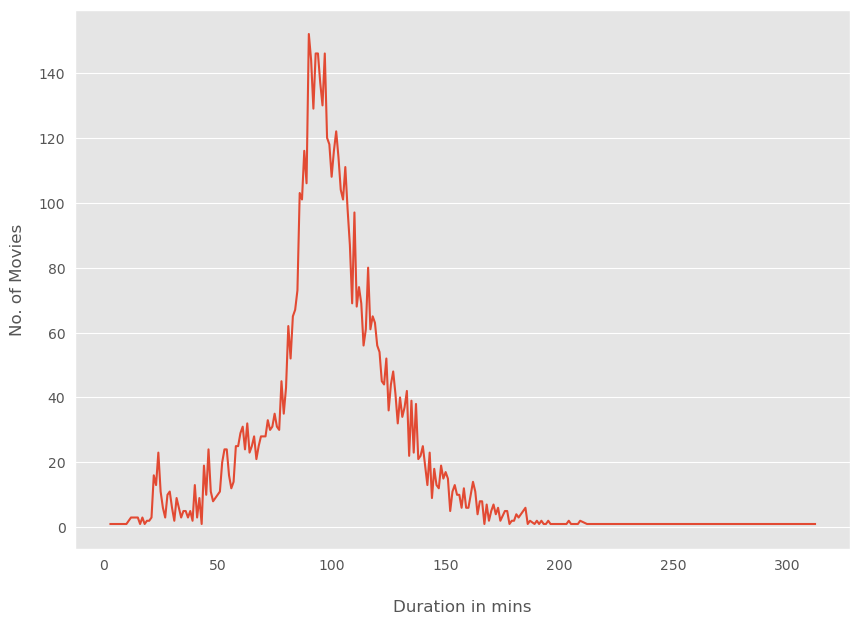

In [13]:
plt.figure(figsize = [10, 7])
sns.lineplot(movie_duration, movie_count)
plt.xlabel("Duration in mins", labelpad = 20)
plt.ylabel("No. of Movies", labelpad = 10)
plt.grid(axis = "x")
plt.tick_params(bottom = False, left = False)
plt.show()

# Top 40 Countries with most TV Shows
    Countries that produce the highest no of tv shows

In [14]:
country = tv["country"].str.split(",")
country1 = []
for i in country:
    if type(i) != list:
        country1.append(None)
    else:
        country1.append(i[0])

tv["country"] = country1

In [15]:
country = tv["country"].value_counts(ascending = False).keys()
counts = tv["country"].value_counts()

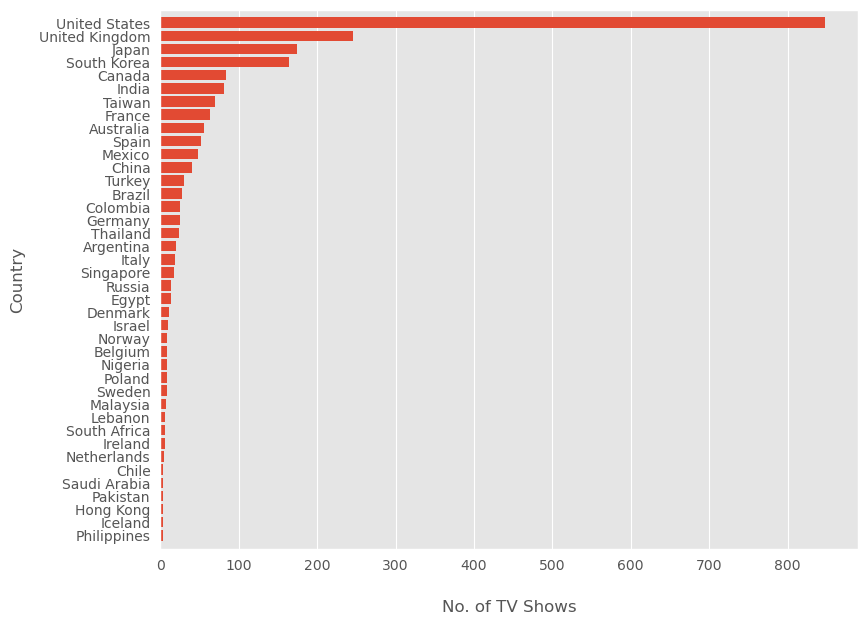

In [16]:
plt.figure(figsize = [9,7])
plt.barh(country[:40], counts[:40])
plt.grid(axis = "y")
plt.ylim(40, -1)
plt.ylabel("Country", labelpad = 10)
plt.xlabel("No. of TV Shows", labelpad = 20)
plt.tick_params(left = False, bottom = False)
plt.show()

# TV Shows with Most number of seasons (Top 20)

In [17]:
tv["duration"] = tv["duration"].str.strip(" Seasons").str.strip(" Season")
tv["duration"] = tv["duration"].astype(int)

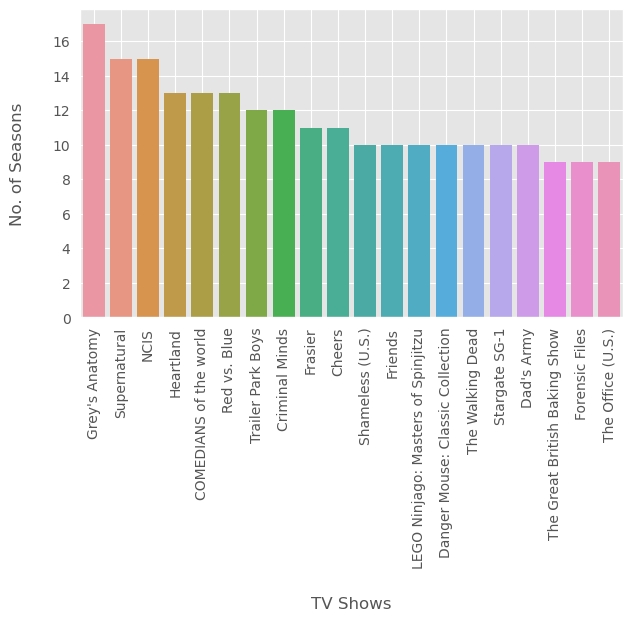

In [21]:
plt.figure(figsize = [7, 4])
sns.barplot(tv.sort_values("duration", ascending = False).iloc[:20,2], tv.sort_values("duration", ascending = False).iloc[:20,-3])

plt.xticks(rotation = 90)
plt.tick_params(bottom = False, left = False)
plt.ylabel("No. of Seasons", labelpad = 20)
plt.xlabel("TV Shows", labelpad = 20)
plt.grid(axis = "x")
plt.show()

# Netflix's favourite Directors
    Directors with most Content on Netflix

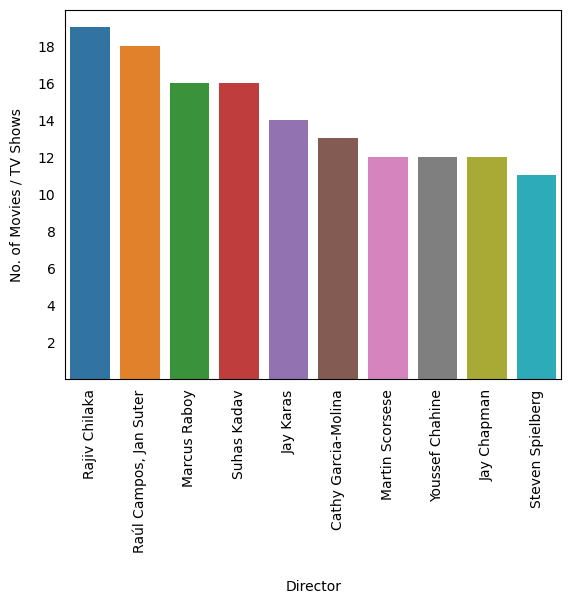

In [5]:
a = sns.barplot(netflix["director"].value_counts()[:10].keys(),netflix["director"].value_counts()[:10])

# a.spines(["top", "bottom"]).set_visible(False)
plt.xticks(rotation = 90)
plt.xlabel("Director", labelpad = 20)
plt.ylabel("No. of Movies / TV Shows", labelpad = 10)
plt.yticks([2,4,6,8,10,12,14,16,18])
plt.tick_params(bottom = False, left = False)
plt.show()